# ***Unsupervised Machine Learning***

In [1]:
import seaborn as sns
from sklearn.datasets import make_blobs

In [6]:
X, y = make_blobs(
    n_samples=10000,
    n_features=5,
    centers=5,
    random_state=42
)

<Axes: >

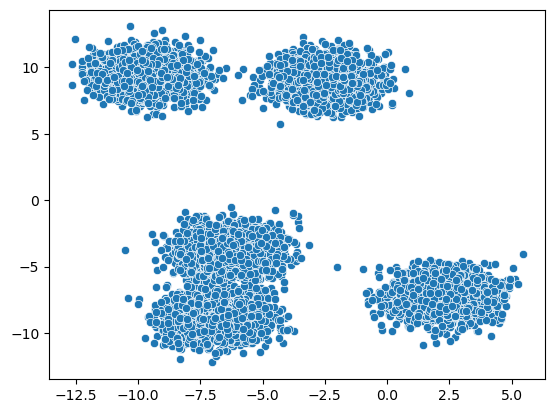

In [7]:
# Visualize
sns.scatterplot(x=X[:, 0], y=X[:, 1])

c:\Users\Abid\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Abid\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Abid\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Abid\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Abid\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

<Axes: >

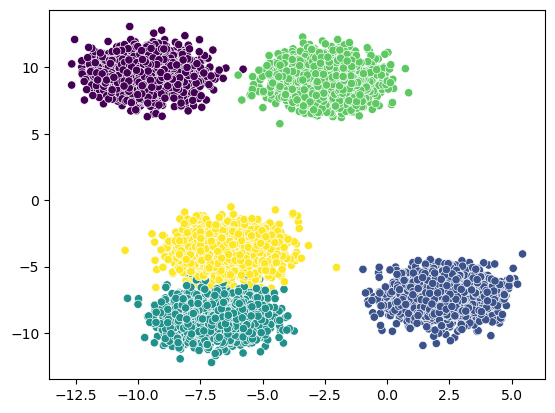

In [8]:
# K-Means Clustering
from sklearn.cluster import KMeans

K = 5

kmeans = KMeans(
    n_clusters=K,
    random_state=42
)
labels = kmeans.fit_predict(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], c=labels)

In [9]:
wcss = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

<Axes: >

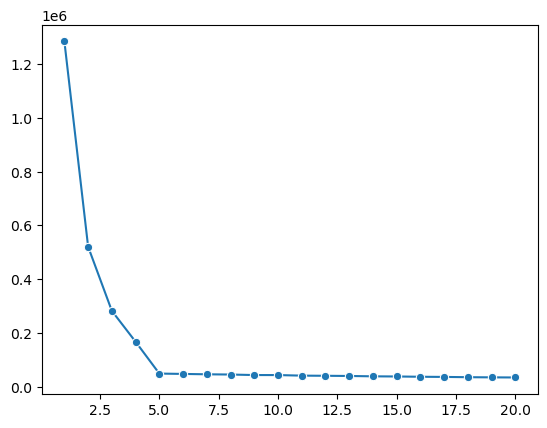

In [10]:
sns.lineplot(x=range(1, 21), y=wcss, marker='o')

In [11]:
!pip install kneed

In [12]:
from kneed import KneeLocator
knee = KneeLocator(range(1, 21), wcss, curve="convex", direction="decreasing")
optimal_k = knee.elbow
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 5


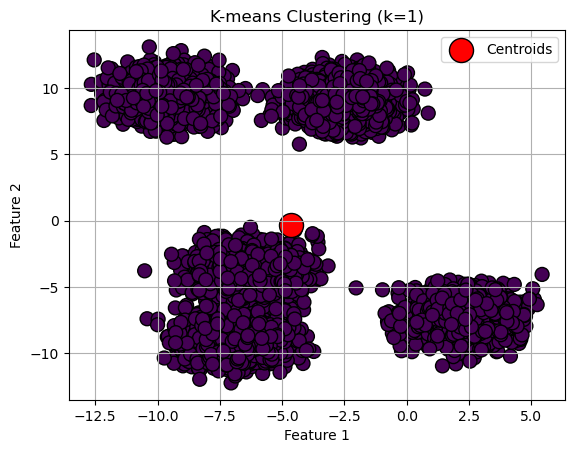

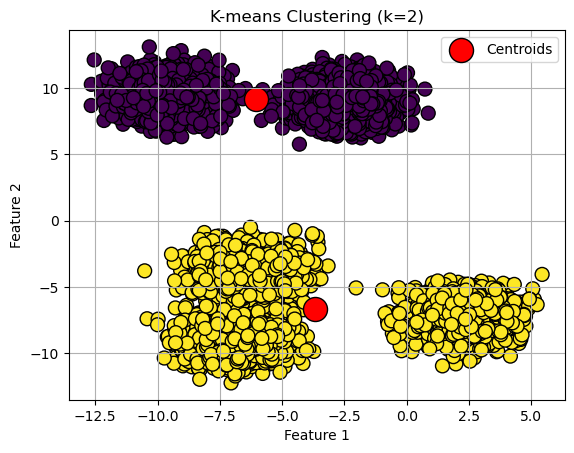

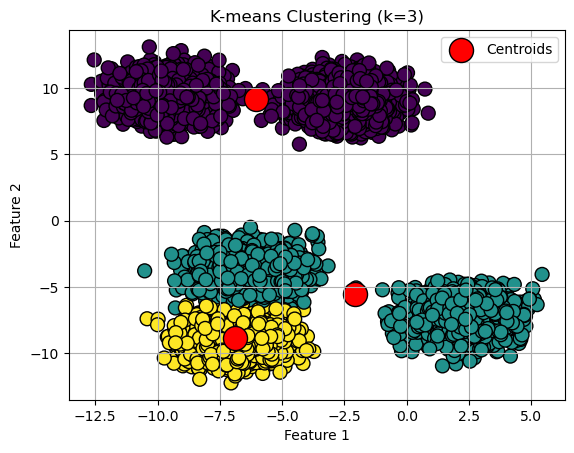

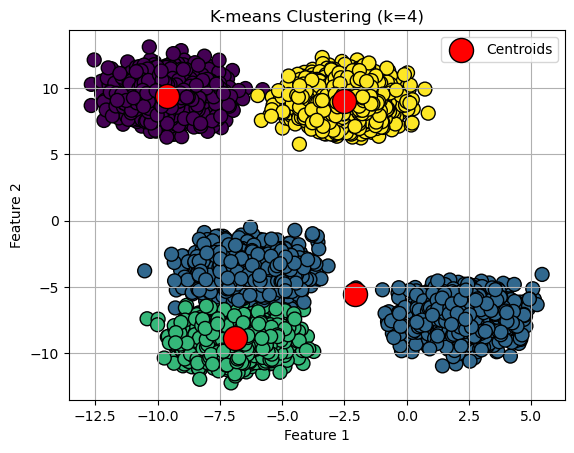

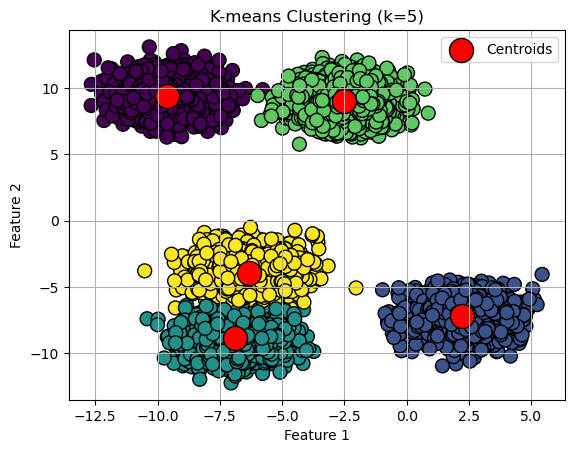

In [14]:
import numpy as np
import matplotlib.pyplot as plt
k_range = range(1, 6)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c='red', label='Centroids', edgecolor='k')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

### Silhouette Score

In [15]:
from sklearn.metrics import silhouette_score

ss = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)

    ss.append(score)

<Axes: >

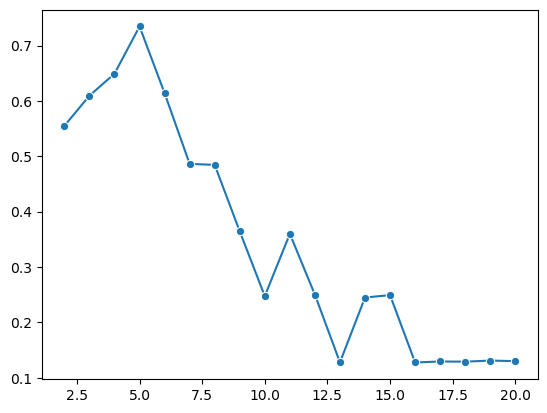

In [16]:
# plot - K & ss

sns.lineplot(x=range(2, 21), y=ss, marker='o')